# Processing the IR dataset

In [1]:
from spectrochempy.api import *
options.log_level=ERROR


        SpectroChemPy's API
        Version   : 0.1a3.dev
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


We read the .scp saved previously

In [2]:
samples = {'P350':{'label':'$\mathrm{M_P}\,(623\,K)$'},
           'A350':{'label':'$\mathrm{M_A}\,(623\,K)$'}, 
           'B350':{'label':'$\mathrm{M_B}\,(623\,K)$'}}

for key, sample in samples.items():
    # our data are in our test `scpdata` directory. 
    basename = os.path.join(scpdata,'agirdata/{}/FTIR/FTIR'.format(key))
    filename = basename + '.scp'
    sample['IR'] = NDDataset.read( filename)

We will resize the data in the interesting region of wavenumbers

In [3]:
for key, sample in samples.items():
    
    s = sample['IR'].copy()
    
    # reduce to a useful windoww of wavenumbers 
    sw = s[:,3990.:1290.]
    
    sample['IR'] = sw # the slicing was not done inplace, let's store this change
    print("{name} : {shape[0]} rows of {shape[1]} wavenumbers.".format(name=key, shape=sw.shape))

P350 : 130 rows of 2801 wavenumbers.
A350 : 178 rows of 2801 wavenumbers.
B350 : 216 rows of 2801 wavenumbers.


<IPython.core.display.Javascript object>


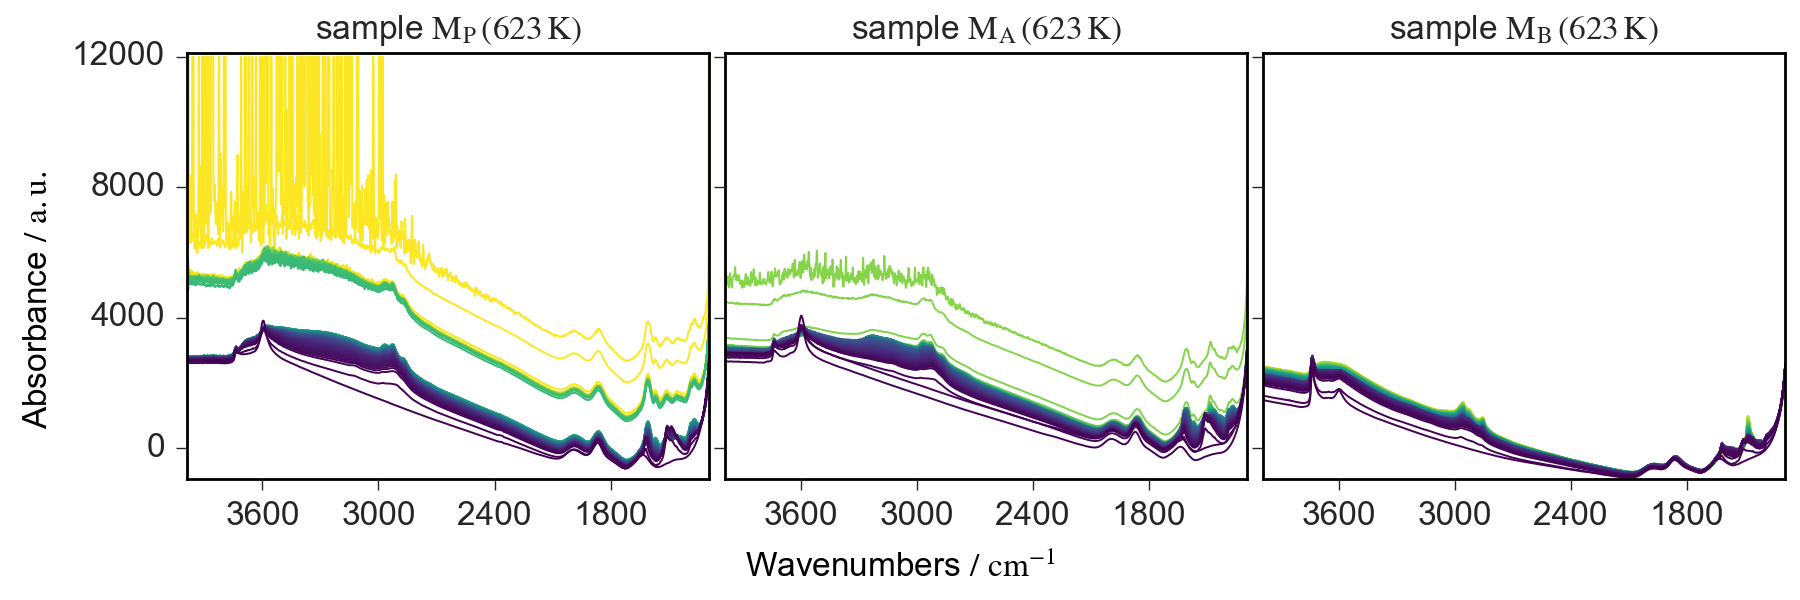

In [4]:
sources = [sample['IR'] for sample in samples.values()]
labels = ["sample "+sample['label'] for sample in samples.values()]

multiplot_stack(sources=sources, labels=labels, nrow=1, ncol=3, figsize=(9,3), sharex=True,
                sharey=True, style='sans', pad=0.2)

## Masking bad data

In [22]:
P350 = samples['P350']['IR'].copy() # copy it so we will not make any damage to the original data

Clearly the lasts spectra have problem with noise. Let's mask them. 

<IPython.core.display.Javascript object>


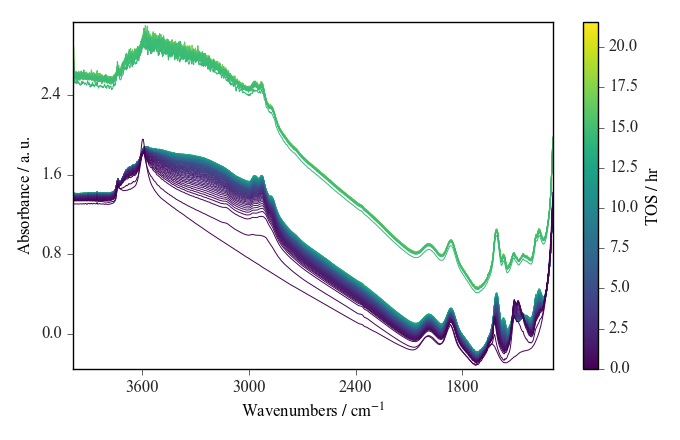

In [23]:
P350[17.5:25.]=masked
P350.plot_stack()

For information it is also possible to set the mask using an interactive window.

<IPython.core.display.Javascript object>


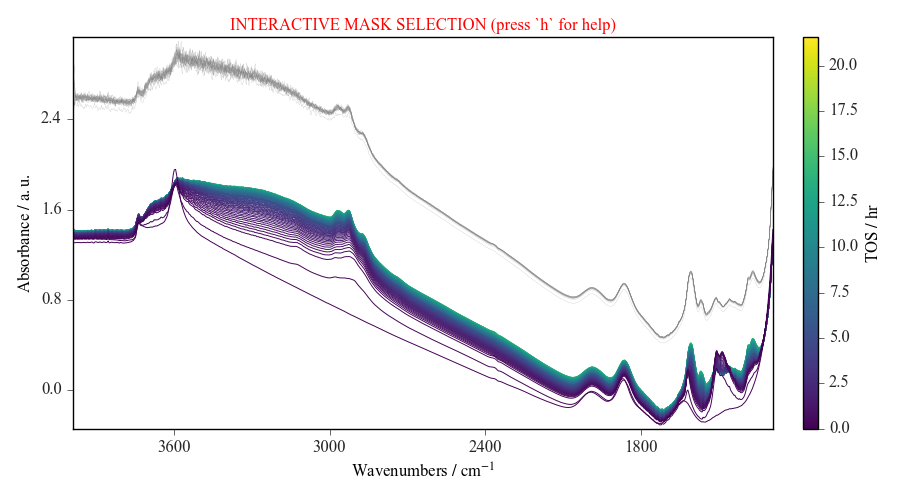

In [24]:
_ = P350.interactive_masks(figsize=(9,5))

<IPython.core.display.Javascript object>


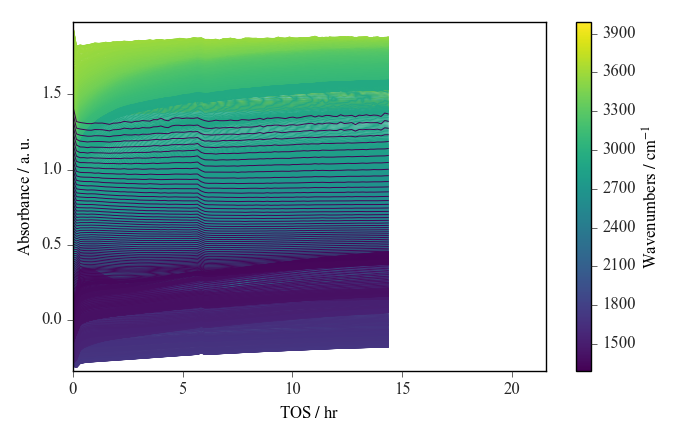

In [28]:
P350.T.plot_stack()

<IPython.core.display.Javascript object>


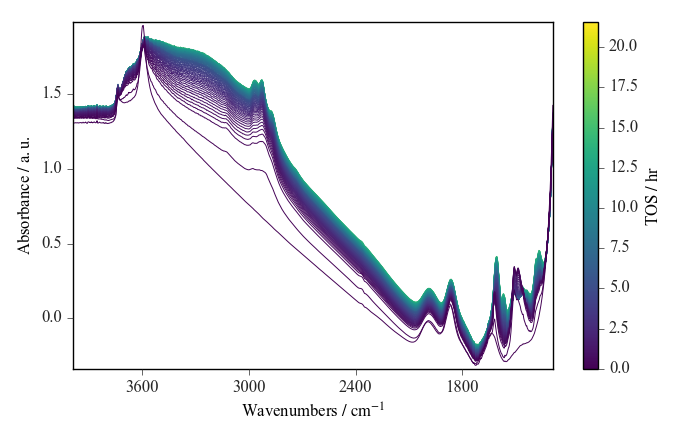

In [26]:
# put back the masked data into the original (destructive!)
P350.plot_stack()
samples['P350']['IR'] = P350.copy() # to save the data

<IPython.core.display.Javascript object>


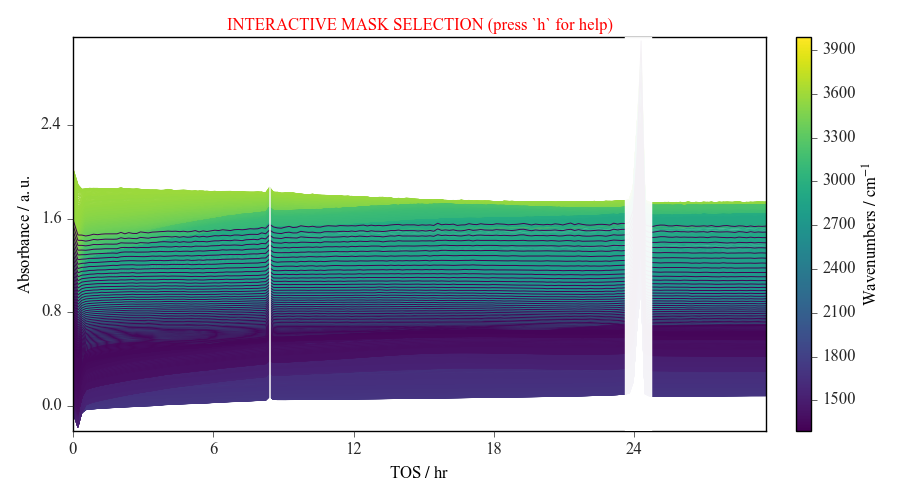

In [34]:
#Sometimes, it may be easier to work on the transposed data
A350= samples['A350']['IR'].copy()
s = A350.T
s.interactive_masks(figsize=(9,5))

<IPython.core.display.Javascript object>


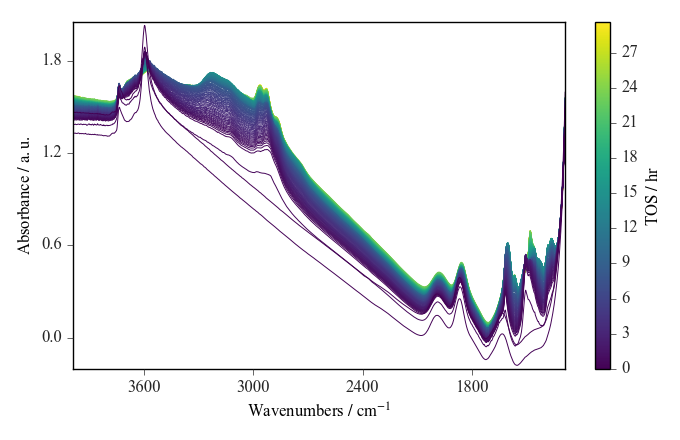

In [36]:
s.T.plot_stack()
